# BEST 11

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv("players_20.csv")
df.head(7)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## GK

In [86]:
#weights
a = 0.5
b = 1
c= 2
d = 3

In [91]:
#GoalKeeping Characterstics
df['gk_Shot_Stopper'] = (b*df.movement_reactions + b*df.mentality_composure + a*df.gk_speed + a*df.power_strength + c*df.power_jumping + b*df.goalkeeping_positioning + c*df.goalkeeping_diving + d*df.gk_reflexes + b*df.gk_handling)/(2*a + 4*b + 2*c + 1*d)
df['gk_Sweeper'] = (b*df.movement_reactions + b*df.mentality_composure + b*df.gk_speed + a*df.attacking_short_passing + a*df.skill_long_passing + b*df.power_jumping + b*df.goalkeeping_positioning + b*df.goalkeeping_diving + d*df.gk_reflexes + b*df.gk_handling + d*df.gk_kicking + c*df.mentality_vision)/(2*a + 4*b + 3*c + 2*d)

Text(0, 0.5, 'Shot Stopping Score')

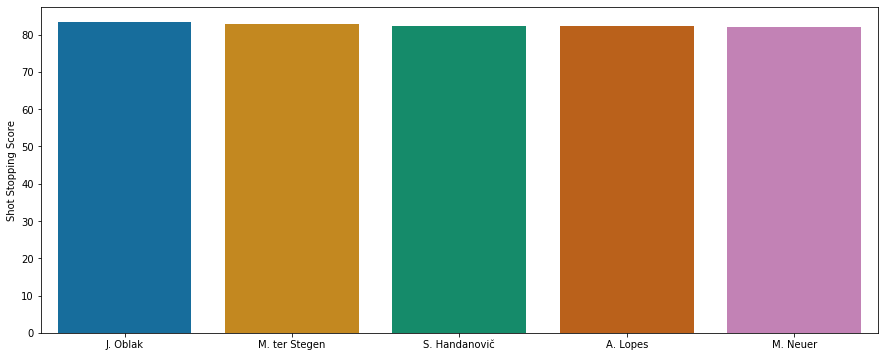

In [101]:
plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = df.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x1 = np.array(list(sd['short_name']))
y1 = np.array(list(sd['gk_Shot_Stopper']))
sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Shot Stopping Score")

In [102]:
sd[['short_name','gk_Shot_Stopper']].head(1)

,short_name,gk_Shot_Stopper
3,J. Oblak,83.333333


Text(0, 0.5, 'Sweeping Score')

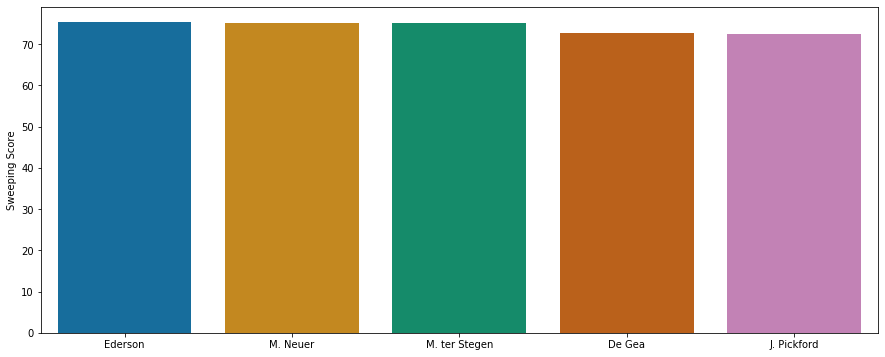

In [103]:
plt.figure(figsize=(15,6))
sd = df.sort_values('gk_Sweeper', ascending=False)[:5]
x2 = np.array(list(sd['short_name']))
y2 = np.array(list(sd['gk_Sweeper']))
sns.barplot(x2, y2, palette= "colorblind")
plt.ylabel("Sweeping Score")

In [104]:
sd[['short_name','gk_Sweeper']].head(1)

,short_name,gk_Sweeper
25,Ederson,75.294118


J. Oblack

## DF

### CB

In [105]:
#Choosing Defenders
df['df_Center_Backs'] = ( d*df.movement_reactions + c*df.mentality_interceptions + d*df.defending_sliding_tackle + d*df.defending_standing_tackle + b*df.mentality_vision+ b*df.mentality_composure + b*df.attacking_crossing +a*df.attacking_short_passing + b*df.skill_long_passing+ c*df.movement_acceleration + b*df.movement_sprint_speed
+ d*df.power_stamina + d*df.power_jumping + d*df.attacking_heading_accuracy + b*df.power_long_shots + d*df.defending_marking + c*df.mentality_aggression)/(6*b + 3*c + 7*d)

Text(0, 0.5, 'CB Score')

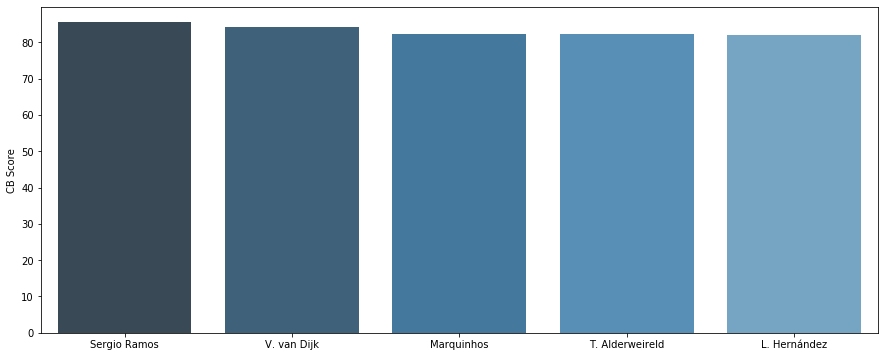

In [106]:
plt.figure(figsize=(15,6))
sd = df[(df['team_position'] == 'CB') | (df['team_position'] == 'RCB') | (df['team_position'] == 'LCB')].sort_values('df_Center_Backs', ascending=False)[:5]
x2 = np.array(list(sd['short_name']))
y2 = np.array(list(sd['df_Center_Backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("CB Score")

In [107]:
sd[['short_name','df_Center_Backs']].head(2)

,short_name,df_Center_Backs
18,Sergio Ramos,85.545455
7,V. van Dijk,84.272727


Sergio Ramos & V. van Dijk

### LB

In [108]:
df['df_fb_Full_Backs'] = (b*df.skill_ball_control + a*df.skill_dribbling + a*df.defending_marking + d*df.defending_sliding_tackle + d*df.defending_standing_tackle + a*df.mentality_positioning + c*df.mentality_vision + c*df.attacking_crossing + b*df.attacking_short_passing + c*df.skill_long_passing + d*df.movement_acceleration +d*df.movement_sprint_speed + c*df.power_stamina + a*df.attacking_finishing)/(4*a + 2*b + 4*c + 4*d)

Text(0, 0.5, 'Left Back Score')

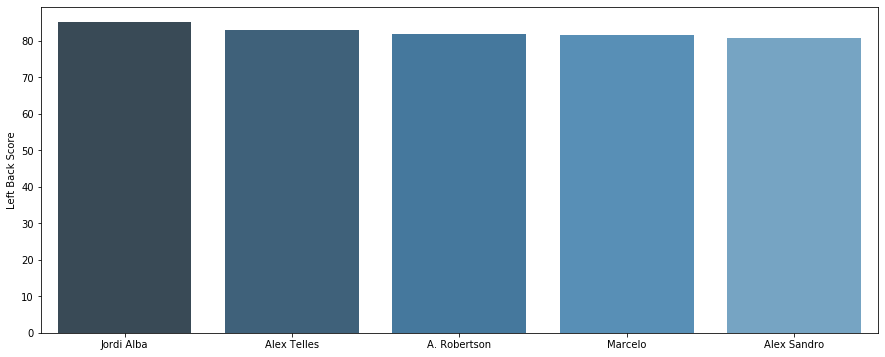

In [109]:
plt.figure(figsize=(15,6))
 
sd = df[(df['team_position'] == 'LWB') | (df['team_position'] == 'LB')].sort_values('df_fb_Full_Backs', ascending=False)[:5]
x4 = np.array(list(sd['short_name']))
y4 = np.array(list(sd['df_fb_Full_Backs']))
sns.barplot(x4, y4, palette=sns.color_palette("Blues_d"))
plt.ylabel("Left Back Score")

In [110]:
sd[['short_name','df_fb_Full_Backs']].head(1)

,short_name,df_fb_Full_Backs
51,Jordi Alba,85.020833


Jordi Alba

### RB

Text(0, 0.5, 'Right Back Score')

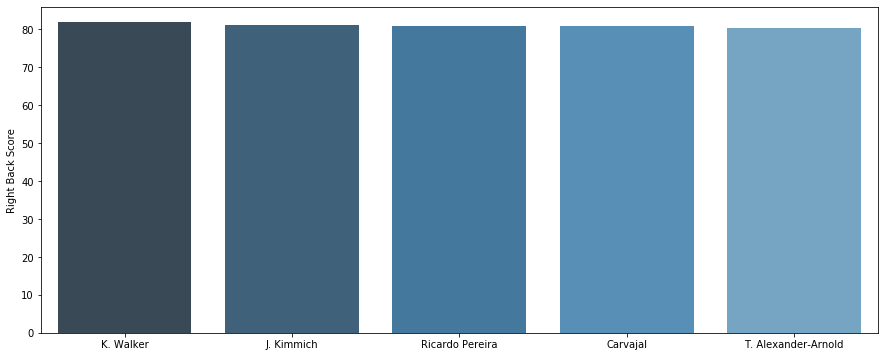

In [111]:
plt.figure(figsize=(15,6))
 
sd = df[(df['team_position'] == 'RWB') | (df['team_position'] == 'RB')].sort_values('df_fb_Full_Backs', ascending=False)[:5]
x4 = np.array(list(sd['short_name']))
y4 = np.array(list(sd['df_fb_Full_Backs']))
sns.barplot(x4, y4, palette=sns.color_palette("Blues_d"))
plt.ylabel("Right Back Score")

In [112]:
sd[['short_name','df_fb_Full_Backs']].head(1)

,short_name,df_fb_Full_Backs
148,K. Walker,81.916667


K. Walker

## MF

In [113]:
#Midfielding Indices
df['mf_playmaker'] = (d*df.skill_ball_control + d*df.skill_dribbling + a*df.defending_marking + d*df.movement_reactions + d*df.mentality_vision + c*df.mentality_positioning + c*df.attacking_crossing + d*df.attacking_short_passing + c*df.skill_long_passing + c*df.skill_curve + b*df.power_long_shots + c*df.skill_fk_accuracy)/(1*a + 1*b + 4*c + 4*d)
df['mf_beast'] = (d*df.movement_agility + c*df.movement_balance + b*df.power_jumping + c*df.power_strength + d*df.power_stamina + a*df.movement_sprint_speed + c*df.movement_acceleration + d*df.attacking_short_passing + c*df.mentality_aggression + d*df.movement_reactions + b*df.defending_marking + b*df.defending_standing_tackle + b*df.defending_sliding_tackle + b*df.mentality_interceptions)/(1*a + 5*b + 4*c + 4*d)
df['mf_controller'] = (b*df.weak_foot + d*df.skill_ball_control + a*df.skill_dribbling + a*df.defending_marking + a*df.movement_reactions + c*df.mentality_vision + c*df.mentality_composure + d*df.attacking_short_passing + d*df.skill_long_passing)/(2*c + 3*d + 4*a)

Text(0, 0.5, 'Beast Score')

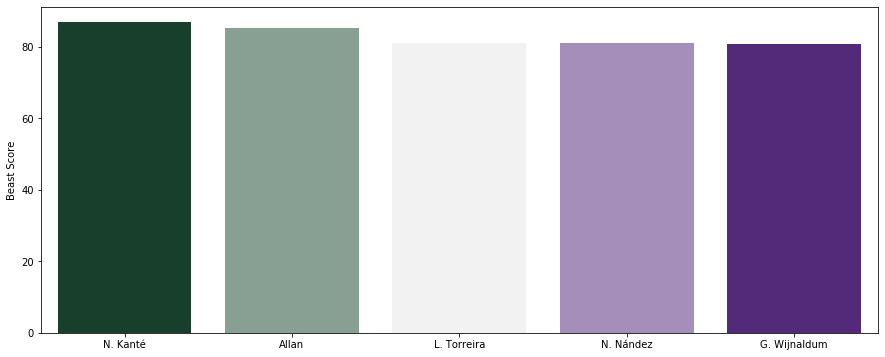

In [114]:
plt.figure(figsize=(15,6))
 
ss = df[(df['team_position'] == 'CM') | (df['team_position'] == 'RCM') | (df['team_position'] == 'LCM') | (df['team_position'] == 'CDM') | (df['team_position'] == 'LDM') | (df['team_position'] == 'RDM')].sort_values('mf_beast', ascending=False)[:5]
x1 = np.array(list(ss['short_name']))
y1 = np.array(list(ss['mf_beast']))
sns.barplot(x1, y1, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Beast Score")

In [116]:
ss[['short_name','mf_beast']].head(1)

,short_name,mf_beast
15,N. Kanté,86.882353


N. kante

Text(0, 0.5, 'Controller Score')

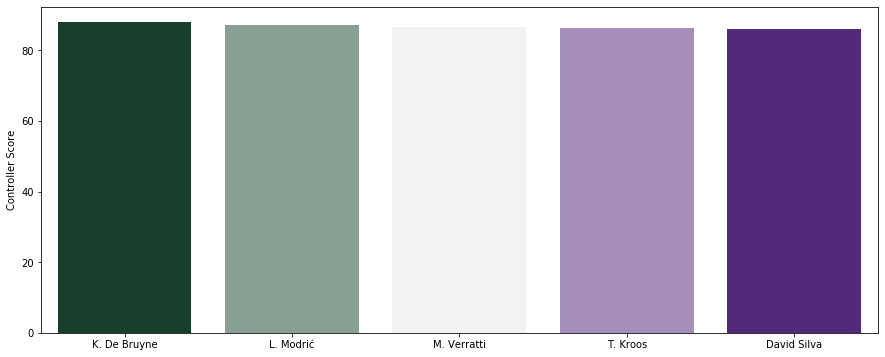

In [117]:
plt.figure(figsize=(15,6))
 
ss = df[(df['team_position'] == 'CM') | (df['team_position'] == 'RCM') | (df['team_position'] == 'LCM') | (df['team_position'] == 'CDM') | (df['team_position'] == 'LDM') | (df['team_position'] == 'RDM')].sort_values('mf_controller', ascending=False)[:5]
x2 = np.array(list(ss['short_name']))
y2 = np.array(list(ss['mf_controller']))
sns.barplot(x2, y2, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Controller Score")

In [118]:
ss[['short_name','mf_controller']].head(1)

,short_name,mf_controller
5,K. De Bruyne,87.966667


K. De Bruyne

Text(0, 0.5, 'PlayMaker Score')

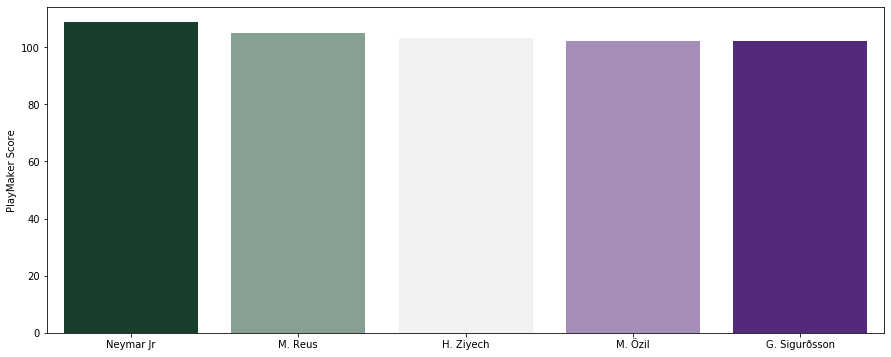

In [119]:
plt.figure(figsize=(15,6))
 
ss = df[(df['team_position'] == 'CAM') | (df['team_position'] == 'RAM') | (df['team_position'] == 'LAM')].sort_values('mf_playmaker', ascending=False)[:5]
x3 = np.array(list(ss['short_name']))
y3 = np.array(list(ss['mf_playmaker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("PlayMaker Score")

In [120]:
ss[['short_name','mf_playmaker']].head(1)

,short_name,mf_playmaker
2,Neymar Jr,108.72093


Neymar Jr

## FW

In [121]:
#Attackers
df['att_left_wing'] = (c*df.weak_foot + c*df.skill_ball_control + c*df.skill_dribbling + c*df.movement_sprint_speed + d*df.movement_acceleration + b*df.mentality_vision + c*df.attacking_crossing + b*df.attacking_short_passing + b*df.skill_long_passing + b*df.mentality_aggression + b*df.movement_agility + a*df.skill_curve + c*df.power_long_shots + b*df.skill_fk_accuracy + d*df.attacking_finishing)/(a + 6*b + 6*c + 2*d)
df['att_right_wing'] = (c*df.weak_foot + c*df.skill_ball_control + c*df.skill_dribbling + c*df.movement_sprint_speed + d*df.movement_acceleration + b*df.mentality_vision + c*df.attacking_crossing + b*df.attacking_short_passing + b*df.skill_long_passing + b*df.mentality_aggression + b*df.movement_agility + a*df.skill_curve + c*df.power_long_shots + b*df.skill_fk_accuracy + d*df.attacking_finishing)/(a + 6*b + 6*c + 2*d)
df['att_striker'] = (b*df.weak_foot + b*df.skill_ball_control + a*df.mentality_vision + b*df.mentality_aggression + b*df.movement_agility + a*df.skill_curve + a*df.power_long_shots + d*df.movement_balance + d*df.attacking_finishing + d*df.attacking_heading_accuracy + c*df.power_jumping + c*df.skill_dribbling)/(3*a + 4*b + 2*c + 3*d)

Text(0, 0.5, 'Left Wing')

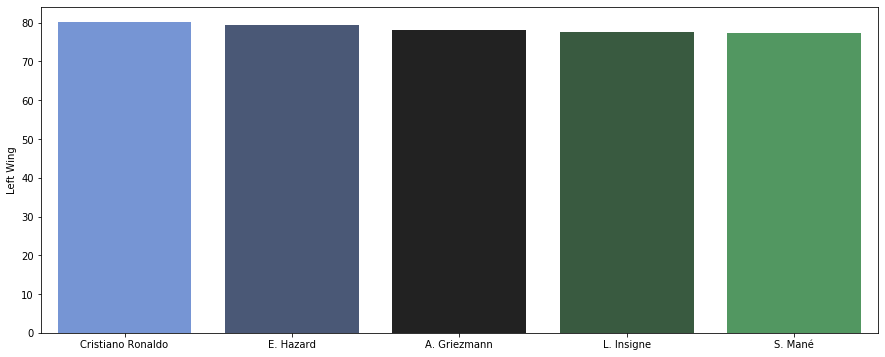

In [122]:
plt.figure(figsize=(15,6))
 
ss = df[(df['team_position'] == 'LW') | (df['team_position'] == 'LM') | (df['team_position'] == 'LS')].sort_values('att_left_wing', ascending=False)[:5]
x1 = np.array(list(ss['short_name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1, y1, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Left Wing")

In [123]:
ss[['short_name','att_left_wing']].head(1)

,short_name,att_left_wing
1,Cristiano Ronaldo,80.142857


Cristiano Ronaldo

Text(0, 0.5, 'Right Wing')

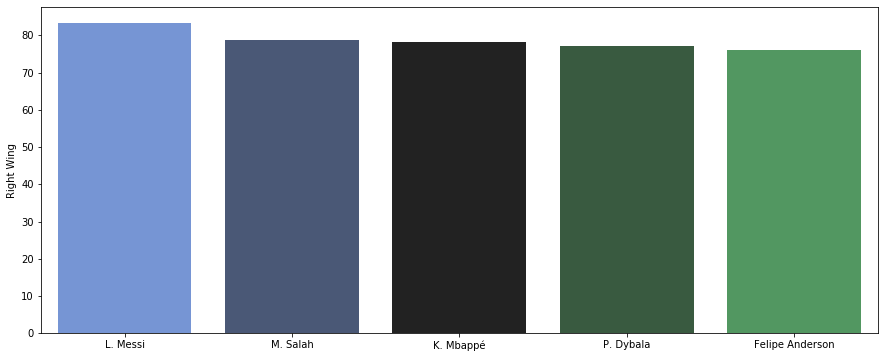

In [124]:
plt.figure(figsize=(15,6))
 
ss = df[(df['team_position'] == 'RW') | (df['team_position'] == 'RM') | (df['team_position'] == 'RS')].sort_values('att_right_wing', ascending=False)[:5]
x2 = np.array(list(ss['short_name']))
y2 = np.array(list(ss['att_right_wing']))
sns.barplot(x2, y2, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Right Wing")

In [125]:
ss[['short_name','att_right_wing']].head(1)

,short_name,att_right_wing
0,L. Messi,83.408163


L. Messi

Text(0, 0.5, 'Striker')

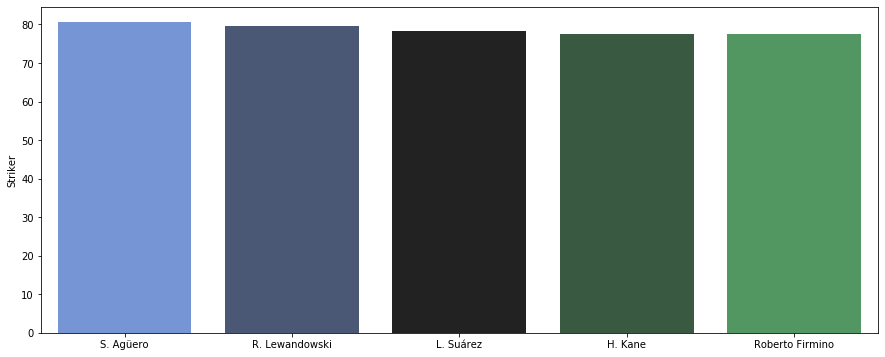

In [126]:
plt.figure(figsize=(15,6))
ss = df[(df['team_position'] == 'ST') | (df['team_position'] == 'LS') | (df['team_position'] == 'RS') | (df['team_position'] == 'CF')].sort_values('att_striker', ascending=False)[:5]
x3 = np.array(list(ss['short_name']))
y3 = np.array(list(ss['att_striker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Striker")

In [127]:
ss[['short_name','att_striker']].head(1)

,short_name,att_striker
17,S. Agüero,80.594595


S. Aguero